In [3]:
import numpy as np
import matplotlib.pyplot as plt



-0.01 0.98
0.01 0.98
-0.01 0.981
0.01 0.981
-0.01 0.982
0.01 0.982
-0.01 0.983
0.01 0.983
-0.01 0.984
0.01 0.984
-0.01 0.985
0.01 0.985
-0.01 0.986
0.01 0.986
-0.01 0.987
0.01 0.987
-0.01 0.988
0.01 0.988
-0.01 0.989
0.01 0.989
-0.01 0.99
0.01 0.99
-0.01 0.991
0.01 0.991
-0.01 0.992
0.01 0.992
-0.01 0.993
0.01 0.993
-0.01 0.994
0.01 0.994
-0.01 0.995
0.01 0.995
-0.01 0.996
0.01 0.996
-0.01 0.997
0.01 0.997
-0.01 0.998
0.01 0.998
-0.01 0.999
0.01 0.999
-0.01 1.0
0.01 1.0
-0.01 1.001
0.01 1.001
-0.01 1.002
0.01 1.002
-0.01 1.003
0.01 1.003
-0.01 1.004
0.01 1.004
-0.01 1.005
0.01 1.005
-0.01 1.006
0.01 1.006
-0.01 1.007
0.01 1.007
-0.01 1.008
0.01 1.008
-0.01 1.009
0.01 1.009
-0.01 1.01
0.01 1.01
-0.01 1.011
0.01 1.011
-0.01 1.012
0.01 1.012
-0.01 1.013
0.01 1.013
-0.01 1.014
0.01 1.014
-0.01 1.015
0.01 1.015
-0.01 1.016
0.01 1.016
-0.01 1.017
0.01 1.017
-0.01 1.018
0.01 1.018
-0.01 1.019
0.01 1.019
-0.01 1.02
0.01 1.02
-0.009 0.98
-0.008 0.98
-0.007 0.98
-0.006 0.98
-0.005 0.98
-0.004 0.

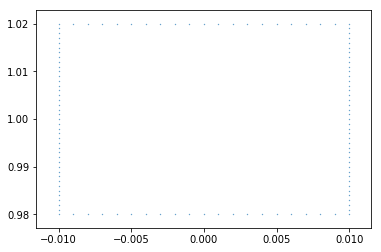

In [4]:
# Construct the test case.

side_length = 0.01
dboundary = 0.001

interior_x = 0.00 # only 3 interior points
interior_y = [0.99, 1.00, 1.01]

boundary_x = -0.01, 0.01
boundary_y = (0.98 + np.linspace(0.0, 0.01, 11)[:-1])
boundary_y = np.append( boundary_y, (0.99 + np.linspace(0.0, 0.01, 11)[:-1]) )
boundary_y = np.append( boundary_y, (1. + np.linspace(0.0, 0.01, 11)[:-1]) )
boundary_y = np.append( boundary_y, (1.01 + np.linspace(0.0, 0.01, 11)) )

X, Y = np.meshgrid( boundary_x , boundary_y )
X, Y = X.reshape(-1,), Y.reshape(-1,)

boundary_y = 0.98, 1.02
boundary_x = (-0.01 + np.linspace(0.0, 0.01, 11)[1:-1]) # truncate leftmost point so we don't duplicate
boundary_x = np.append(boundary_x, 0 + np.linspace(0.0, 0.01, 11)[:-1])

Xt, Yt = np.meshgrid( boundary_x, boundary_y )
Xt, Yt = Xt.reshape(-1,), Yt.reshape(-1,)

X, Y = np.append(X, Xt), np.append(Y, Yt)


#Convoluted Rounding
X = np.round(X ,int(np.ceil(np.abs(np.log10(dboundary)))))
Y = np.round(Y ,int(np.ceil(np.abs(np.log10(dboundary)))))

# convoluted check for duplicate points
assert( len(np.unique( np.array( 
                    list(map( np.array, zip(X, Y) ))), axis=0)) == len(X))


for i in range(len(X)):
    print(X[i],Y[i])
plt.scatter(X, Y, s=0.1)
#X[i,j], Y[i,j] gives a coordinate.

assert np.allclose( [dboundary], [boundary_x[-1] - boundary_x[-2]])

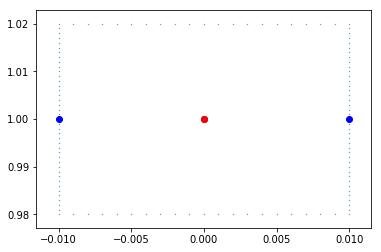

In [5]:
# What's the next thing to do?

# The nearest interior point is...


test_points = np.meshgrid( np.linspace(-0.01, 0.01, 3), [1.] )
for i, _ in enumerate(test_points):
    test_points[i] = test_points[i].reshape(-1,)
    
    
def nearest(x, y, h=0.01):
    basex, basey = h * np.floor( x / h ), h * np.floor( y / h )
    cx = h * np.round( (x / h) % 1 ) + basex
    cy = h * np.round( (y / h) % 1 ) + basey
    return cx, cy

def is_interior(pt):
    cx, cy = pt
    temp = np.array([cx, cy])
    interior_points = np.array( [ [0.0, 0.99], [0.0, 1.0], [0.0, 1.01] ])
    for i in range(interior_points.shape[0]):
        if np.allclose( interior_points[i], temp ):
            return True
    return False

plt.scatter(X, Y, s=0.1)

plt.plot(test_points[0], test_points[1], 'bo')
for i in range(len(test_points[0])):
    if is_interior(nearest(test_points[0][i], test_points[1][i])):
        plt.plot(test_points[0][i], test_points[1][i], 'ro')

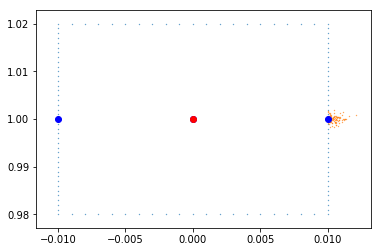

In [6]:
# what should dt be? We want 95% of points 

# dt | 2 * np.sqrt(dt) < 0.5 dboundary
# so np.sqrt(dt) < 0.25 db
# dt < 0.5 db ** 2

dt = 0.5 * (dboundary ** 2)


# Now sample.

ind = np.intersect1d( np.where( X == 0.01) , np.where( Y == 1.0) )[0]


pt = np.array([X[ind], Y[ind]])

steps = np.array( [np.abs( np.random.randn(100) ) * np.sqrt(dt), np.random.randn(100) * np.sqrt(dt) ] )


## Duplicate code.
plt.scatter(X, Y, s=0.1)

plt.plot(test_points[0], test_points[1], 'bo')
for i in range(len(test_points[0])):
    if is_interior(nearest(test_points[0][i], test_points[1][i])):
        plt.plot(test_points[0][i], test_points[1][i], 'ro')
## Duplicate code.


temp = pt.reshape(2,1) + steps
plt.scatter( temp[0], temp[1] , s=0.1)
plt.show()

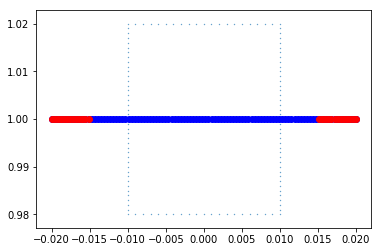

In [7]:
# Draw the box of points surrounding my grid.


def outside(x, y):
    global X # Hacks.
    global Y
    
    box_limits = [-0.015, 0.015]
    boy_limits = [0.975, 1.025]
    
    rval = 1
    if x > box_limits[0] and x < box_limits[1]:
        if y > boy_limits[0] and y < boy_limits[1]:
            rval = -1
    # boundary check!
    if x in X and y in Y:
        rval = 0
    return rval



## Duplicate code.
plt.scatter(X, Y, s=0.1)
## Duplicate code.


# Check my box function!
inout_test_points = np.meshgrid( np.linspace(-0.02, 0.02, 100), [1.] )
for i, _ in enumerate(test_points):
    inout_test_points[i] = inout_test_points[i].reshape(-1,)
    
plt.plot(inout_test_points[0], inout_test_points[1], 'bo') # Red -> outside

for i in range(len(inout_test_points[0])):
    if outside(inout_test_points[0][i], inout_test_points[1][i]) == 1.:
        plt.plot(inout_test_points[0][i], inout_test_points[1][i], 'ro')
    


starting over.
Total wasted walks (raw): 1


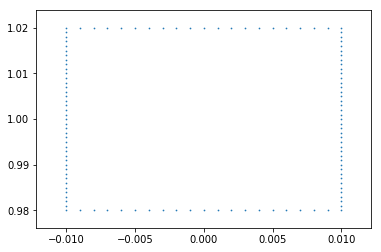

In [8]:
x, y = pt
pathx, pathy = [], []

## Duplicate code.
plt.scatter(X, Y, s=0.5)
## Duplicate code.

# What percentage of walks go to the interior, when I don't check for collisions with the boundary or exterior?
freq = 0
for i in range(50):
    for i in range(1000):
        if np.allclose([x, y], [pt[0], pt[1]]):
            x, y = x + np.abs(np.random.randn() * np.sqrt(dt)), y + np.random.randn() * np.sqrt(dt)
        else:
            x, y = x + np.random.randn() * np.sqrt(dt), y + np.random.randn() * np.sqrt(dt)

        cx, cy = nearest(x, y)
        if is_interior((cx, cy)):
            print("starting over.")
            freq += 1
            x, y = pt
            #plt.plot(pathx, pathy) # in a different colour
            #pathx, pathy = [], []

        #pathx.append(x)
        #pathy.append(y)

    #plt.plot(pathx, pathy)

print(f"Total wasted walks (raw): {freq}")

In [18]:
# How can I check for a collision with the boundary?

def nearest1d(x, h):
    basex = h * np.floor( x / h )
    cx = h * np.round( (x / h) % 1 ) + basex
    return cx


def all_neighbours(x, y, h):
    '''
    Get the 4 nearest grid points for this pt
    '''
    basex, basey = h * np.floor( x / h ), h * np.floor( y / h )
    return list(map(np.array, [ [basex, basey], [basex + h, basey], [basex, basey + h], [basex + h, basey + h]]))


def hit_boundary(pt, dboundary=0.001, h=0.01, atol=1e-7):
    x, y = pt
    
    # Amazing! Idea: add a 'thickness' to the wall, but only on the inside!
    nbrs = all_neighbours(x, y, h)
    print(nbrs)
    for nbr in nbrs:
        print(outside(nbr[0], nbr[1]))
    if any( [ outside(nbr[0], nbr[1]) for nbr in nbrs] ): # the current point lives inside a boundary square
        return None
    
    print('goo')
    
    
    # coarse mesh bdry point
    cx, cy = nearest(x, y)
    if outside(cx, cy) == 0.:
        # get the closest fine-grained boundary point.
        deltax = cx - x
        deltay = cy - y
        
        nbrs = [None, None] # every coarse grid point has 2 neighbours
        
        # Get coarse grid mesh neighbouts
        if deltax <= 0: # x is to left of cx
            nbrs[0] = [cx - h, cy]
        else:
            nbrs[0] = [cx + h, cy]
        if deltay <= 0:
            nbrs[1] = [cx, cy - h]
        else:
            nbrs[1] = [cx, cy + h]
        
        # closest boundary point
        bdry_pt = None
        delta = np.inf
        if outside(nbrs[0][0], nbrs[0][1]) == 0:
            bdry_pt = [nearest1d(x, dboundary) , cy ]
            delta = np.abs( bdry_pt[0] - x )
        if outside(nbrs[1][0], nbrs[1][1]) == 0:
            temp = [cx, nearest1d(y, dboundary)]
            if bdry_pt is None or np.abs(bdry_pt[1] - y) < delta:
                bdry_pt = temp
        
        # check if boundary pt is within tolerance.
        if bdry_pt is None:
            return None # No hit.
        else:
            
            dist = np.linalg.norm( bdry_pt - np.array(pt) )
            #print("--")
            #print(dist)
            if dist < 2. * dboundary: # fiddle with this?
                #return bdry_pt
                
                # hack: round the bdry_pt to the nearest hth
                return np.round(bdry_pt,
                               int(np.ceil(np.abs(np.log10(dboundary)))))
                
    return None
        
            
            
             

In [19]:

temp_zeros = np.zeros(len(X))
def get_index(pt):
    global X
    global Y 
    global temp_zeros
    
    # still hacks.
    #try:
    ind = np.intersect1d( np.where(np.isclose(X - pt[0], temp_zeros)) , 
                          np.where(np.isclose( Y - pt[1], temp_zeros)) 
                        )[0]
    #except Exception as e:
    #    print(f"Invalid point passed to get_index? {pt}")
    #    return
    return ind


# for example...



In [20]:
for i, pt in enumerate(zip(X, Y)):
    #plt.plot(pt[0], pt[1], 'bo')
    #print(pt, i)
    assert get_index(pt) == i
    #print(pt)
# yay shadowing


[array([0.  , 0.99]), array([0.01, 0.99]), array([0., 1.]), array([0.01, 1.  ])]
0
0
0
0
goo
0
Wasted : 0, Coupled: 1, Outside: 0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


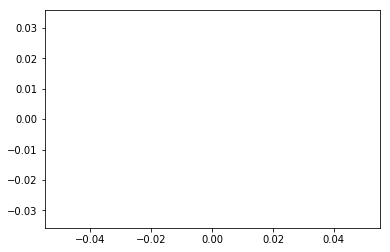

In [21]:
total_boundary_value = np.zeros(len(X)) # one for every point, obviously
frequencies = np.zeros( (len(X), len(X)) )

#assert len(np.nonzero(frequencies)[0]) == 0
#x, y = pt
pathx, pathy = [], []

np.random.seed(2)
## Duplicate code.
#plt.scatter(X, Y, s=0.5)
## Duplicate code.

# What percentage of walks go to the interior, when I check for collisions with the boundary?
freq = 0
bfreq = 0
ofreq = 0

placebo_fn = lambda x, y: 0.
g = lambda x, y: x ** 3 + y ** 3 - 3 * x ** 2 * y -3 * y ** 2 * x + 5.
single = False # Check "True" if only measuring a single point. 


# A Test Case:
# [np.array([-0.01, 1.02])] = pt
# seed with 0
# 100 steps, 10 paths -- path 7
# particle almost hits boundary about 3 or 4 times before the boundary condition is detected!

# test case / debugging
#for _, pt in enumerate([np.array([-0.01, 1.02])]):
for _, pt in enumerate([np.array([0.01, 1.0])]):
#for i, pt in enumerate(zip(X, Y)): # wrapped everything in a loop
    myind = get_index(pt)
    for i in range(0,1): # number of samples
        pathx, pathy = [], []
        x, y = pt
        for j in range(100): # nsteps of random walk
            if single:
                pathx.append(x)
                pathy.append(y)

            # update point position

            # this does actually save some computation, but the coupling matrix equation becomes more complicated.
            # figure it out later.
            #if np.allclose([x, y], [pt[0], pt[1]]): # on first walk, prefer walk to the left. 
            #    x, y = x + np.abs(np.random.randn() * np.sqrt(dt)), y + np.random.randn() * np.sqrt(dt)
            #else:
            x, y = x + np.random.randn() * np.sqrt(dt), y + np.random.randn() * np.sqrt(dt)
        
            if outside(x, y) >= 0:

                ofreq += 1
                if single:
                    print("Went outside (huzzah!)")
                    pathx.append(x)
                    pathy.append(y)

                #TODO: update the total boundary value.
                total_boundary_value[myind] += g(x, y)
                #print(f"{j}, g(j) is {g(x,y)}")

                break

            cx, cy = nearest(x, y)
            if is_interior((cx, cy)):
                freq += 1
                if single:
                    print("starting over.")
                    pathx, pathy = [], []
                x, y = pt

            bdry_pt = hit_boundary([x, y])
            if bdry_pt is not None:
                
                print(j)
                
                bfreq += 1
                if single:
                    pathx.append(x)
                    pathy.append(y)
                    print(f'Hit the boundary!: {len(pathx)} steps, ({x}, {y})')

                # TODO: update the frequency of the nearest point
                ind = get_index(bdry_pt)
                #print(ind)
                frequencies[myind, ind] += 1

                #print(len(np.nonzero(frequencies)[0]))
                break

        
        if single:
            plt.plot(pathx, pathy)
            plt.plot(x, y, 'ro') # final position for this particle

    if single:
        plt.plot(pt[0], pt[1], 'bo') # plot the initial location
        print(pt)
    print(f"Wasted : {freq}, Coupled: {bfreq}, Outside: {ofreq}")

plt.axis('equal')
# Oh dear.
# where is the boundary supposed to be again?
#0.01 in the x coordinate
#1 in the y coordinate
#which means that

print(total_boundary_value)

In [13]:
get_index((-0.01, 1.011)) # oh, this actually **shouldn't** be on the boundary



62

In [14]:
# Ok, so can we get the frequency update to work?

nx, ny = np.nonzero(frequencies)
for i in range(len(nx)):
    print(f'PT ({X[nx[i]]}, {Y[nx[i]]}) -> ({X[ny[i]]}, {Y[ny[i]]}): {frequencies[nx[i], ny[i]]}')

In [15]:
print(total_boundary_value)

[  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        339.3260063
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   

In [16]:
# Ok, let's do the solve.
N = 100 # see "for i in range(**)" loop in main body

# Maybe divide by N later if the boundary values overflow
A = ( N * np.eye( len(X), len(X) ) - frequencies )
b = total_boundary_value

print(np.linalg.matrix_rank(A), len(X)) ## -> 120, 120 NICE

u = np.linalg.solve(A , b)
gg = np.vectorize(g)

soln = gg(X, Y)
#print( (u - soln)) # My god this convergence is slow as shit
print(soln)
print(u)

# The L2 norm error:
error = (dboundary * (len(X) - 1) * np.sum(np.abs(u - soln))) - 0.5 * (np.abs((u -soln))[0] + np.abs((u - soln))[-1])

#print(error)

# And the true solution is something like 0.68. Ouch.

120 120
[5.969709   5.912087   5.97265167 5.91491201 5.97560029 5.91774285
 5.97855486 5.92057952 5.98151538 5.92342202 5.98448188 5.92627037
 5.98745434 5.92912458 5.99043277 5.93198463 5.99341719 5.93485055
 5.9964076  5.93772234 5.999404   5.9406     6.0024064  5.94348354
 6.00541481 5.94637297 6.00842923 5.94926829 6.01144966 5.9521695
 6.01447612 5.95507663 6.01750862 5.95798966 6.02054714 5.9609086
 6.02359171 5.96383347 6.02664233 5.96676427 6.029699   5.969701
 6.03276173 5.97264367 6.03583053 5.97559229 6.0389054  5.97854686
 6.04198634 5.98150738 6.04507337 5.98447387 6.0481665  5.98744634
 6.05126571 5.99042477 6.05437103 5.99340919 6.05748246 5.9963996
 6.0606     5.999396   6.06372366 6.0023984  6.06685345 6.00540681
 6.06998937 6.00842123 6.07313142 6.01144166 6.07627962 6.01446812
 6.07943398 6.01750062 6.08259448 6.02053914 6.08576115 6.02358371
 6.08893399 6.02663433 6.092113   6.029691   5.96688393 5.96405293
 5.961216   5.95837314 5.95552437 5.9526697  5.94980911 5.9

Wasted : 0, Coupled: 0, Outside: 344


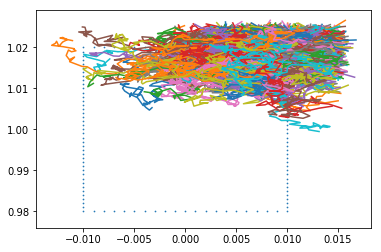

In [177]:
# Rough work.


# What if I skip the coupling?

x, y = pt
pathx, pathy = [], []

## Duplicate code.
plt.scatter(X, Y, s=0.5)
## Duplicate code.

# What percentage of walks go to the interior, when I check for collisions with the boundary?
freq = 0
bfreq = 0
ofreq = 0
for i in range(500):
    pathx, pathy = [], []
    x, y = pt
    for i in range(100):
        
        if np.allclose([x, y], [pt[0], pt[1]]): # on first walk, prefer walk to the left.
            x, y = x + np.abs(np.random.randn() * np.sqrt(dt)), y + np.random.randn() * np.sqrt(dt)
        else:
            x, y = x + np.random.randn() * np.sqrt(dt), y + np.random.randn() * np.sqrt(dt)
        
        pathx.append(x)
        pathy.append(y)
        
        if outside(x, y) >= 0:
            #print("Went outside (huzzah!)")
            ofreq += 1
            break
            
    plt.plot(pathx, pathy)


print(f"Wasted : {freq}, Coupled: {bfreq}, Outside: {ofreq}")

# Oh dear.

# removed the code for coupling and for wasting.
# It looks like we only get back half of what we send when we don't walk for very long.
# Could the weighting be **low enough** on the far-away points that we can ignore all of the points
# that couldn't hit the boundary quickly enough?

# If you change the nsteps to 1000, we get much better #outside. However, this case is kind of atypical
# since the interior is small.

In [96]:
## Ok, let's try the coupled version just to see if it's any good when I try it on my very-well-defined test case.

In [ ]:

# Todo: move into function.
def coupled_point_walk(point):
    freq = 0
    bfreq = 0
    ofreq = 0
    for i in range(100):
        pathx, pathy = [], []
        x, y = pt
        for i in range(100):

            if np.allclose([x, y], [pt[0], pt[1]]): # on first walk, prefer walk to the left.
                x, y = x + np.abs(np.random.randn() * np.sqrt(dt)), y + np.random.randn() * np.sqrt(dt)
            else:
                x, y = x + np.random.randn() * np.sqrt(dt), y + np.random.randn() * np.sqrt(dt)

            pathx.append(x)
            pathy.append(y)

            if outside(x, y) >= 0:
                #print("Went outside (huzzah!)")
                ofreq += 1
                break

        plt.plot(pathx, pathy)